##Цель эксперимента
Проверить, влияет ли перемещение первого рекламного блока выше основной ленты товаров на ключевые пользовательские метрики (вовлеченность, добавления, заказы).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style='whitegrid')

## 1. Загрузка и предварительная проверка данных

In [4]:
# Загрузка данных
file_path = '/content/final_results_to_analyze2.csv'
df = pd.read_csv(file_path)
df.head()

,date,client_id,ab_group,is_view_ads,cnt_view_ads,is_adds_ads,cnt_adds_ads,sum_adds_ads,is_orders_ads,cnt_orders_ads,sum_orders_ads
0,2024-07-26,8881380,test,0,0,0,0,0,0,0,0
1,2024-07-28,850950385,test,0,0,0,0,0,0,0,0
2,2024-07-25,50885,control,0,0,0,0,0,0,0,0
3,2024-07-26,601239,control,0,0,0,0,0,0,0,0
4,2024-07-28,694655866,control,0,0,0,0,0,0,0,0


## 2. Исследование поведения пользователей до эксперимента

,cnt_view_ads,cnt_adds_ads,cnt_orders_ads
ab_group,,,
control,0.088738,0.032252,0.011389
test,0.089098,0.033229,0.011962


Text(0.5, 1.0, 'Распределение заказов')

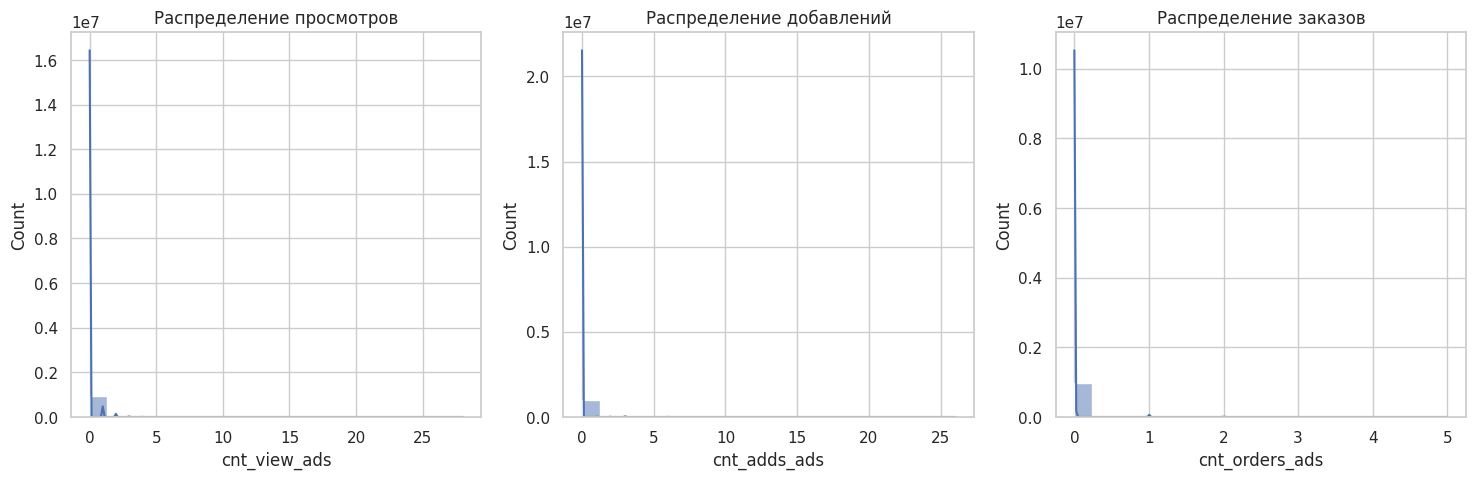

In [5]:
# Средние значения метрик
summary = df.groupby('ab_group')[['cnt_view_ads', 'cnt_adds_ads', 'cnt_orders_ads']].mean()
display(summary)

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['cnt_view_ads'], kde=True, ax=axes[0]).set_title('Распределение просмотров')
sns.histplot(df['cnt_adds_ads'], kde=True, ax=axes[1]).set_title('Распределение добавлений')
sns.histplot(df['cnt_orders_ads'], kde=True, ax=axes[2]).set_title('Распределение заказов')

## 3. Конверсии и ключевые метрики

In [6]:
df['CTR'] = df['cnt_view_ads'] / (df['cnt_view_ads'] + 1e-5)
df['CR'] = df['cnt_adds_ads'] / (df['cnt_view_ads'] + 1e-5)
df[['CTR', 'CR']].describe()

,CTR,CR
count,981510.000000,981510.000000
mean,0.052206,0.020304
std,0.222441,0.215301
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,15.999840


## 4. Расчет MDE и размера выборки

In [7]:
def get_MDE(mu, std, sample_size, alpha=0.05, beta=0.2):
    z_alpha = stats.norm.ppf(1 - alpha / 2)
    z_beta = stats.norm.ppf(1 - beta)
    mde = (z_alpha + z_beta) * std / np.sqrt(sample_size / 2)
    return mde, mde * 100 / mu

# Пример
mu = 0.1
std = 0.05
sample_sizes = [1000, 2000, 5000, 10000]

for size in sample_sizes:
    abs_mde, rel_mde = get_MDE(mu, std, size)
    print(f"Sample size: {size} → MDE: {abs_mde:.4f} ({rel_mde:.2f}%)")

Sample size: 1000 → MDE: 0.0063 (6.26%)
Sample size: 2000 → MDE: 0.0044 (4.43%)
Sample size: 5000 → MDE: 0.0028 (2.80%)
Sample size: 10000 → MDE: 0.0020 (1.98%)


## 5. Результаты эксперимента: сравнение групп

In [8]:
# Сравнение по группам
metrics = ['cnt_view_ads', 'cnt_adds_ads', 'cnt_orders_ads', 'sum_orders_ads']
for metric in metrics:
    group_test = df[df.ab_group == 'test'][metric]
    group_control = df[df.ab_group == 'control'][metric]
    stat, p = stats.ttest_ind(group_test, group_control, nan_policy='omit')
    print(f"{metric}: p-value = {p:.4f}")

cnt_view_ads: p-value = 0.7079
cnt_adds_ads: p-value = 0.1674
cnt_orders_ads: p-value = 0.0406
sum_orders_ads: p-value = 0.0428


## 6. Выводы и рекомендации

| Метрика                 | p-value    | Вывод                                                 |
| ----------------------- | ---------- | ----------------------------------------------------- |
| Количество просмотров   | 0.7079     | Различия отсутствуют, изменения не повлияли на показы |
| Количество добавлений   | 0.1674     | Нет статистически значимого роста                     |
| Количество заказов      | **0.0406** | ✅ Есть статистически значимое улучшение               |
| Сумма заказов (выручка) | **0.0428** | ✅ Зафиксирован рост выручки                           |


Основной эффект был достигнут на уровне заказов и денежной выручки, что является бизнес-критически важным результатом.

#Интерпретация
Новое размещение рекламы не увеличило просмотры и добавления напрямую, но сделало пользователей более склонными к покупкам.

##Возможные причины:

реклама стала заметнее и воспринимается серьёзнее;
первый экран лучше захватывает внимание;
выросла конверсия при прежней вовлеченности.

#Рекомендации
✅ Внедрить новое размещение рекламы как основное:
* эффект на ключевые метрики подтвержден статистически;
* рост заказов и выручки делает изменение оправданным.



✅ Провести дополнительный анализ по сегментам: кто больше реагирует на верхнее размещение (новички, активные пользователи, определённые категории товаров).

✅ Запустить последующий эксперимент:
* изучить, как изменится поведение пользователей в более долгосрочной перспективе (2+ недели);
* проверить, не приводит ли изменение к выгоранию или баннерной слепоте.
